# Exploring Correlation in a Movie Database

## Table of Contents

- [Introduction](#introduction)
- [Data Summary](#loading-data)
- [Data Cleaning](#data-cleaning)
- [Plotting Correlation Matrices](#plot-corr-matrix)
- [Bivariate Exploration](#bivariate)
    

## Introduction <a id="introduction"></a>

This analysis aims to uncover relationships and patterns among various movie attributes using a dataset containing three decades of movie data (1986-2016) acquired from https://www.kaggle.com/datasets/danielgrijalvas/movies. By examining correlations, this analysis aims to gain insights into which factors (such as budget, genre, and viewer voting) might influence each other and most importantly how they may affect a movie's gross earnings.

This exploration begins by acquiring and cleaning the necessary data, ensuring that it's in a suitable format for analysis. Once the data is prepared, correlation matrices will be plotted to visualize the strength and direction of relationships between different movie attributes. These matrices will determine the factors with the highest correlation to gross earning as well as any other factors that may show high correlation with each other. Finally, to gain further insight, the factors identified to show high correlation will be further visualised through scatter and regression plots.  

## Data Summary<a id="loading-data"></a>

Each entry has the following attributes:

- name         : name of the movie
- rating       : rating of the movie (R, PG-13, etc.)
- genre        : main genre of the film
- year         : release year
- released     : release date
- score        : IMDb score
- votes        : count of IMDb user votes
- director     : the director of the film
- writer       : the writer of the film
- star         : the main actor/actress of the film
- country      : country of origin
- budget       : the budget of a movie
- gross        : the revenue of the movie
- company      : the production company
- runtime      : movie runtime in minutes

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

# Read in csv
df = pd.read_csv(r'C:\Users\Rahma\OneDrive\Desktop\movies.csv')

In [2]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
df.shape

(7668, 15)

In [4]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

## Data Cleaning <a id="data-cleaning"></a>

- Check for missing data
- Datatype formatting
- Remove any duplicate entries

### Missing Data

In [5]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [6]:
null_rows = df.isnull().any(axis=1).sum()
print(null_rows, "rows with missing data")

2247 rows with missing data


In [7]:
df.dropna(inplace=True)

In [8]:
null_rows = df.isnull().any(axis=1).sum()
print(null_rows, "rows with missing data")

0 rows with missing data


### Datatype Formatting 

In [9]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [10]:
# changing float datatypes to remove extra decimal point (.0)
df['votes'] = df['votes'].astype('int64')
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')

In [11]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


In [12]:
pd.set_option('display.max_row',None)

### Removing Duplicate Entries

In [13]:
original = df.shape
df.drop_duplicates()
new = df.shape
if (original == new):
    print("No duplicates Found")
else:
    duplicates_removed = original[0] - new[0]
    print(f"{duplicates_removed} duplicates removed")

No duplicates Found


## Plotting Correlation Matrices <a id="plot-corr-matrix"></a>

In [14]:
df.corr(numeric_only=True) # method = pearson(default), kendall, spearman

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


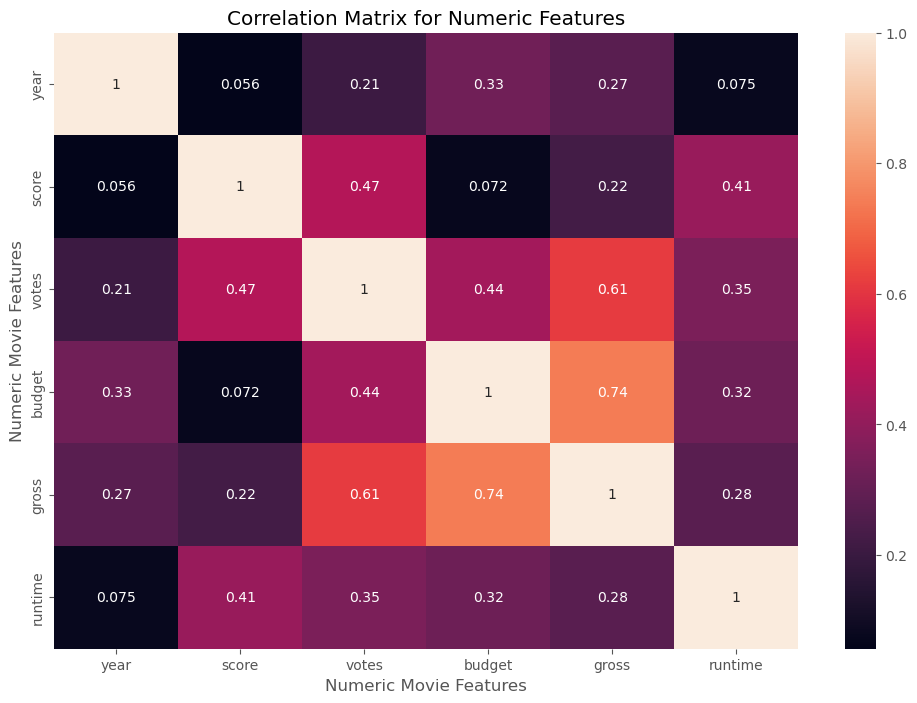

In [15]:
# Visualising the correlation matrix

correlation_matrix = df.corr(numeric_only=True)

sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Numeric Movie Features')
plt.ylabel('Numeric Movie Features')
plt.show()

High correlation between gross and budget, Medium correlation between votes and gross

In [16]:
# numerise categorical data
df_numerised = df.copy()

for col_name in df_numerised.columns:
    if (df_numerised[col_name].dtype == 'object'):
        df_numerised[col_name] = df_numerised[col_name].astype('category')
        df_numerised[col_name] = df_numerised[col_name].cat.codes
        
df_numerised.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,4692,6,6,1980,1304,8.4,927000,1795,2832,699,46,19000000,46998772,1426,146
1,3929,6,1,1980,1127,5.8,65000,1578,1158,214,47,4500000,58853106,452,104
2,3641,4,0,1980,1359,8.7,1200000,757,1818,1157,47,18000000,538375067,945,124
3,204,4,4,1980,1127,7.7,221000,889,1413,1474,47,3500000,83453539,1108,88
4,732,6,4,1980,1170,7.3,108000,719,351,271,47,6000000,39846344,1083,98


In [17]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


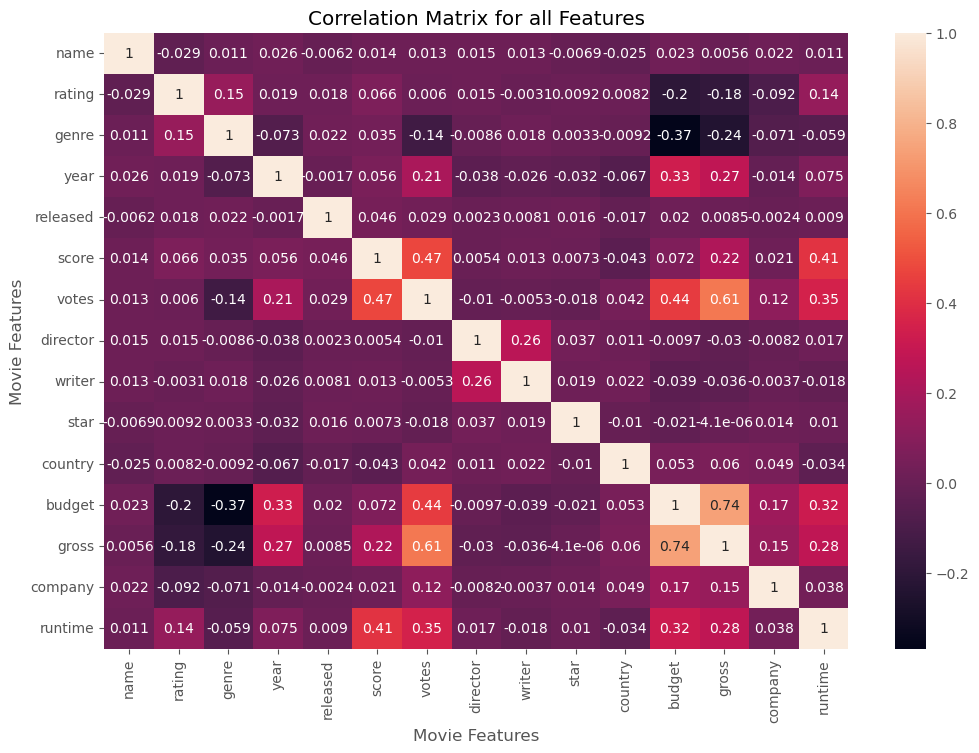

In [18]:
# Visualising the correlation matrix

correlation_matrix = df_numerised.corr(numeric_only=True)

sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for all Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [19]:
# using unstack to see highest correlations quicker

correlation_matrix = df_numerised.corr(numeric_only=True)

corr_pairs = correlation_matrix.unstack()

corr_pairs

name      name        1.000000
          rating     -0.029234
          genre       0.010996
          year        0.025542
          released   -0.006152
          score       0.014450
          votes       0.012615
          director    0.015246
          writer      0.012880
          star       -0.006882
          country    -0.025490
          budget      0.023392
          gross       0.005639
          company     0.021697
          runtime     0.010850
rating    name       -0.029234
          rating      1.000000
          genre       0.147796
          year        0.019499
          released    0.018083
          score       0.065983
          votes       0.006031
          director    0.014656
          writer     -0.003149
          star        0.009196
          country     0.008230
          budget     -0.203946
          gross      -0.181906
          company    -0.092357
          runtime     0.140792
genre     name        0.010996
          rating      0.147796
        

In [20]:
# sorting corr_pairs by ascending order
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

budget    genre      -0.368523
genre     budget     -0.368523
          gross      -0.244101
gross     genre      -0.244101
budget    rating     -0.203946
rating    budget     -0.203946
          gross      -0.181906
gross     rating     -0.181906
genre     votes      -0.135990
votes     genre      -0.135990
company   rating     -0.092357
rating    company    -0.092357
genre     year       -0.073167
year      genre      -0.073167
genre     company    -0.071334
company   genre      -0.071334
year      country    -0.066748
country   year       -0.066748
genre     runtime    -0.059237
runtime   genre      -0.059237
country   score      -0.043051
score     country    -0.043051
budget    writer     -0.039466
writer    budget     -0.039466
director  year       -0.038354
year      director   -0.038354
writer    gross      -0.035885
gross     writer     -0.035885
country   runtime    -0.034477
runtime   country    -0.034477
star      year       -0.032157
year      star       -0.032157
director

In [21]:
# Now to filter to only show high correlation pairs
high_corr = sorted_pairs[(sorted_pairs)>0.5] 
high_corr

votes     gross       0.614751
gross     votes       0.614751
          budget      0.740247
budget    gross       0.740247
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

Votes and budgest have the highest correlation to a film's gross earning.

## Bivariate Exploration <a id="bivariate"></a>

Based on the previous section the following factors showed high correlation with each other:
- Budget and Gross
- Votes and Gross

Consequently, scatter and regression plots will be employed to visually represent these correlations.

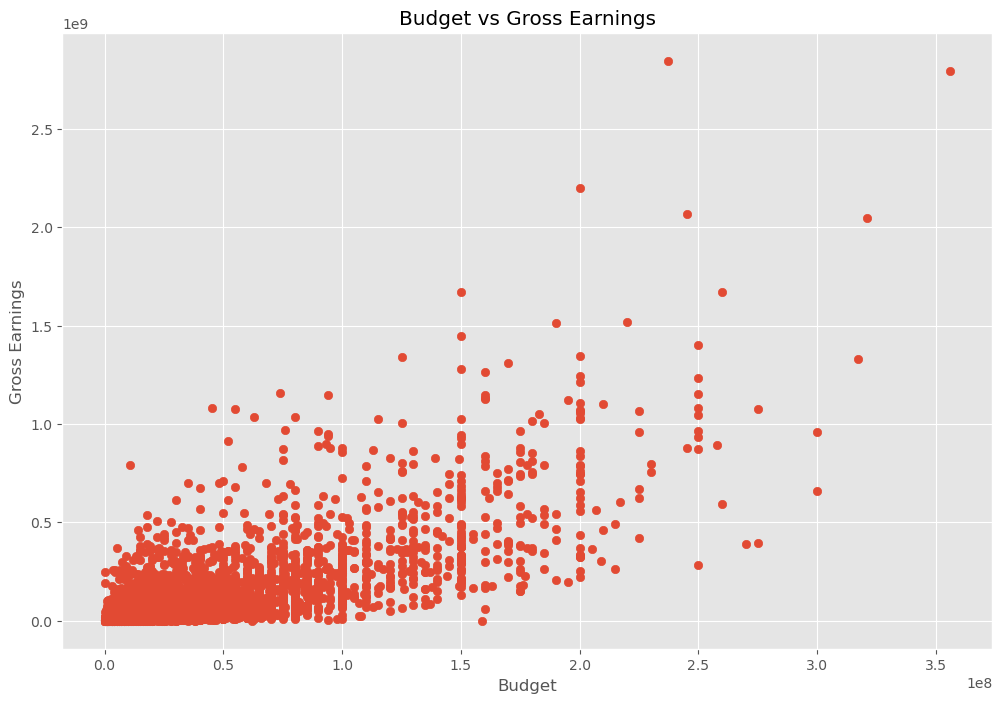

In [22]:
# Bi-variate comparisons
# Budget vs Gross
# Votes vs Gross

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget')
plt.ylabel('Gross Earnings')
plt.show()

In [23]:
# just to fact check above graph
# df.sort_values(by=['gross'], inplace=False, ascending=False)

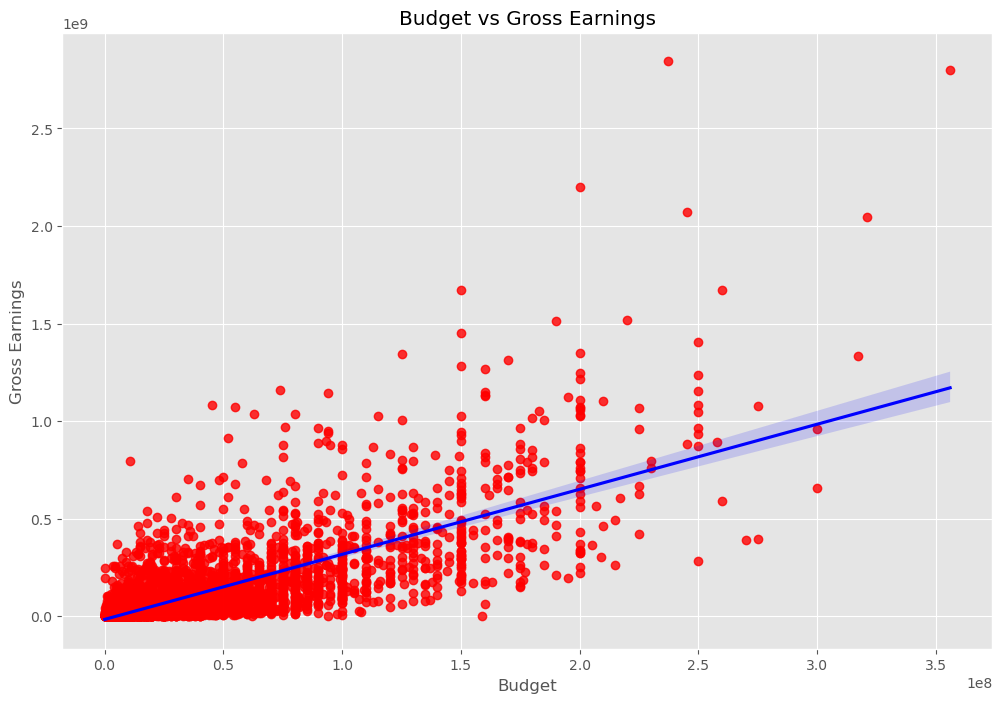

In [24]:
# Regression Plot (Budget vs Gross) using Seaborn
sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget')
plt.ylabel('Gross Earnings')
plt.show()

Through the regression plot we can see a positive linear correlation between budget and gross income.

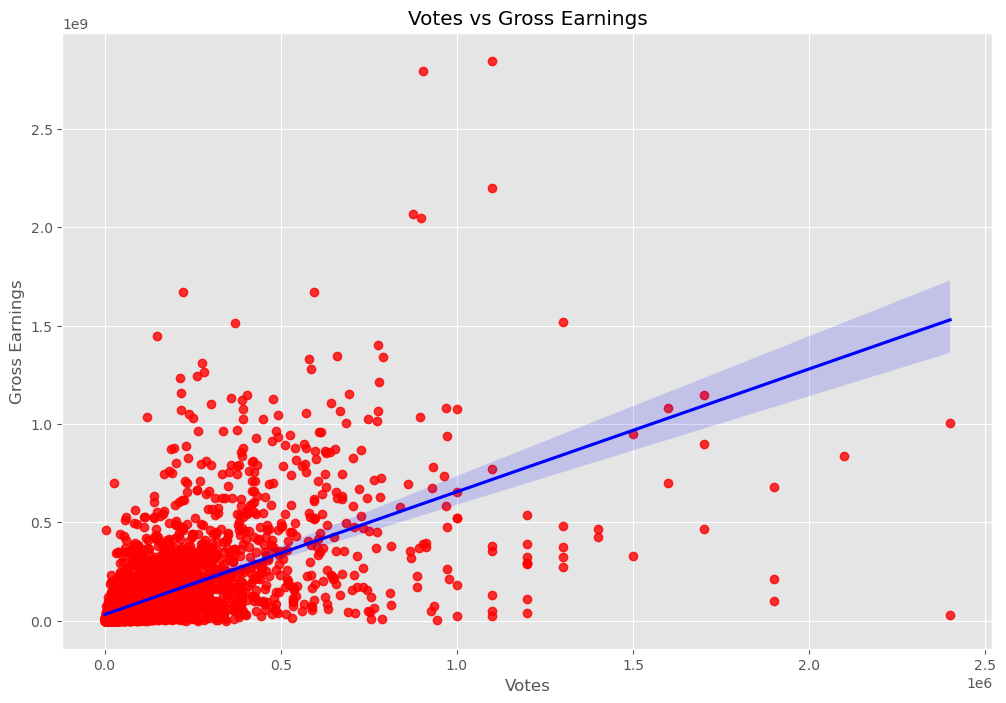

In [25]:
# Regression Plot (Votes vs Gross) using Seaborn
sns.regplot(x='votes', y='gross', data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})
plt.title('Votes vs Gross Earnings')
plt.xlabel('Votes')
plt.ylabel('Gross Earnings')
plt.show()

Through the regression plot we can see a positive linear correlation between the number of votes and a movie's gross income.

## Conclusion

In conclusion, the analysis revealed significant correlations between certain key factors in the movie industry dataset. Specifically, it was found that both budget and the number of votes exhibited strong positive correlations with gross earnings. This suggests that higher budgets and greater viewer engagement, as reflected by the number of IMDB user votes, tend to coincide with higher gross earnings for movies.

However, it is to be noted that correlation does not imply causation. While the analysis identified associations between these variables, it does not establish a cause-and-effect relationship. Other factors not considered in this analysis may also influence movie earnings.

Further research could include developing multiple regression models or conducting causal inference analysis to investigate whether there is a causal relationship between budget/user votes and gross earnings. 

Overall, this analysis explored the correlation of various factors and the financial success of movies, providing valuable insights for stakeholders across the entertainment industry.